In [722]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [568]:
companies = pd.read_csv("companies.csv", encoding= 'unicode_escape')
rounds2 = pd.read_csv("rounds2.csv", encoding= 'unicode_escape')
mapping = pd.read_csv('mapping.csv', encoding= 'unicode_escape')

In [569]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [570]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [571]:
### Checkpoint 1: Data Cleaning 1

### Unique Companies Present in rounds2


In [572]:
rounds2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [573]:
# rounds2['company'] = rounds2['company_permalink'].str.split('/').apply(lambda x: x[-1]).str[1:]
# unique_round2.dtypes

In [574]:
# rounds2.groupby('company').company.count().unique().sum()

In [575]:
companies.shape

(66368, 10)

In [576]:
rounds2.shape

(114949, 6)

In [577]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [578]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [579]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [580]:
companies["permalink"] = companies.permalink.str.lower()
rounds2["company_permalink"] = rounds2.company_permalink.str.lower()

In [581]:
unique_companies_round2 = rounds2.company_permalink.nunique(dropna=True)
unique_companies_round2

66370

In [582]:
unique_companies_companies = companies.permalink.unique()
len(unique_companies_companies)

66368

In [583]:
master_frame = pd.merge(companies, rounds2, left_on="permalink", right_on="company_permalink")
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [584]:
# checking null values in the new merged frame
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
dtype: int64

In [585]:
master_frame.drop('permalink', axis = 1, inplace=True)
master_frame.shape

(114942, 15)

In [586]:
master_frame.raised_amount_usd.isnull().sum()

19984

In [587]:
master_frame.isnull().sum()

name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
dtype: int64

In [588]:
# lets see which columns have the most number of null values in the newly merged table
round((master_frame.isnull().sum() * 100)/ len(master_frame.index),2)


name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [589]:
# as we can see from above, the 'funding_round_code' and 'founded_at' have the highest number of nulls, 73% and 18% respectively
# since we wont need these 2 columns we can go ahead and remove them
master_frame.drop(['funding_round_code','founded_at', 'homepage_url', 'state_code','region','city'], axis=1,inplace=True)

In [590]:
master_frame.isnull().sum()

name                           1
category_list               3407
status                         0
country_code                8671
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          19984
dtype: int64

In [591]:
# now lets check the null percentage in the dataset again
round((master_frame.isnull().sum() * 100)/ len(master_frame.index),2)


name                        0.00
category_list               2.96
status                      0.00
country_code                7.54
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [592]:
# since we need the column 'raised_amount_usd', we can go ahead and remove any null rows
mask = np.isnan(master_frame['raised_amount_usd'])
master_frame = master_frame[~mask]



In [593]:
#lets check the percentage again
round((master_frame.isnull().sum() * 100)/ len(master_frame.index),2)

name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [594]:
#we'll remove the nulls in the country code and in the categorylist column
mask = pd.isnull(master_frame['country_code'])
mask1 = pd.isnull(master_frame['category_list'])
master_frame = master_frame[~mask]
master_frame = master_frame[~mask1]
master_frame.isnull().sum()

<ipython-input-594-b61d5800cb1e>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  master_frame = master_frame[~mask1]


name                       1
category_list              0
status                     0
country_code               0
company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
dtype: int64

In [595]:
len(master_frame['funding_round_type'].unique())

14

In [747]:
# there are 14 unique investments, now we have reduce the funding types to only 'seed', 'angel','venture','private equity'
maskm = master_frame['funding_round_type'].isin(['venture','angel', 'seed', 'private_equity'])
master_frame = master_frame[maskm]

In [597]:
# we can group by the 'funding_round_type' to get the average funding for each funding types
master_frame_funding_type = master_frame.groupby('funding_round_type')
master_frame_funding_type['raised_amount_usd'].mean()

funding_round_type
angel             9.715739e+05
private_equity    7.393849e+07
seed              7.477937e+05
venture           1.172422e+07
Name: raised_amount_usd, dtype: float64

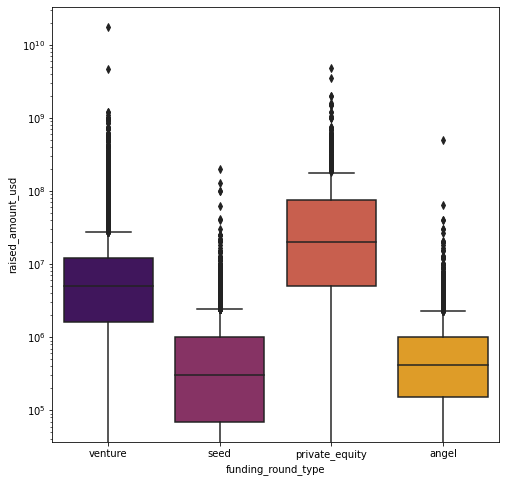

In [837]:
# based on the mean of the funding types, we can clearly see that the best option for Spark Fund is Venture,
# it meets their constraint of 5M - 15M
#lets create a boxplot to visualize it better
plt.figure(figsize=(8,8))
sns.boxplot(x='funding_round_type', y = 'raised_amount_usd', palette  = 'inferno', data = master_frame)
plt.yscale('log')
plt.show()

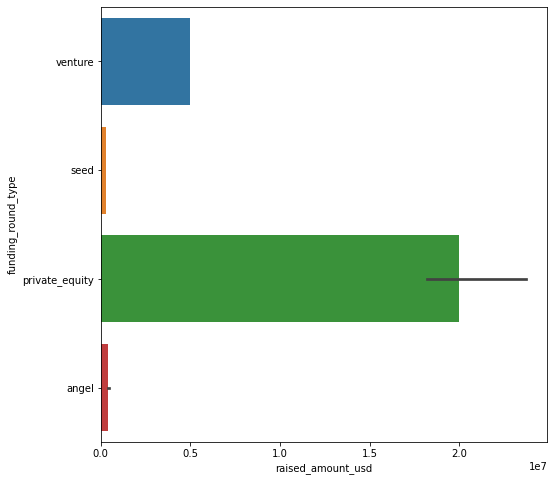

In [838]:
plt.figure(figsize=(8,8))
sns.barplot(x='raised_amount_usd', y= 'funding_round_type', data = master_frame, estimator = np.median)
plt.show()

In [600]:
### Checkpoint 3: Country Analysis

In [601]:
ventures = master_frame[master_frame["funding_round_type"] == "venture"]
ventures.shape

(47809, 9)

In [602]:
ventures.head()

,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
4,0-6.com,Curated Web,operating,CHN,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
8,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
10,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0


In [603]:
# get the top9 countries and sort them in decending order

In [604]:
venture_country = ventures.groupby('country_code')
venture_country['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

In [605]:
# get the top 9 countires in country code
top_countries = ["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"]
top9 = ventures[ventures['country_code'].isin(top_countries)]
top9

,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
4,0-6.com,Curated Web,operating,CHN,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
8,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
10,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
...,...,...,...,...,...,...,...,...,...
114915,ZYOMYX,Biotechnology,operating,USA,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0
114916,ZYOMYX,Biotechnology,operating,USA,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0
114927,Zyrra,E-Commerce,operating,USA,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0
114929,Zystor,Biotechnology,acquired,USA,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0


In [606]:
# remove null rows from top9
mask3 = top9.category_list.isnull()
top9 = top9[~mask3]


In [607]:
# Top 3 English-speaking countries in the data frame top9 are:
# 1. USA
# 2. GBR
# 3. IND

In [608]:
#### Checkpoint 4: Sector Analysis 1

In [609]:
# were creating another column 'primary_sector' so when we can do the merge later on
ventures['primary_sector'] = ventures['category_list'].str.split('|',1).str[0].str.lower()

<ipython-input-609-95a874133c23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventures['primary_sector'] = ventures['category_list'].str.split('|',1).str[0].str.lower()


In [610]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [611]:
ventures.shape

(47809, 10)

In [612]:
# Lets remove the null columns from the dataset
mask3 = pd.isnull(mapping.category_list)
mapping = mapping[~mask3]
mapping['category_list'] = mapping['category_list'].str.lower()
mapping.head()
# mapping.shape

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0


In [613]:
mapping[mapping['category_list']=='nan']

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"


In [614]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [615]:
mapping.head(50).tail(31).head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
21,alumni,0,0,0,0,0,0,0,1,0
22,a0lytics,0,0,0,0,0,0,0,0,1
23,android,0,0,0,0,0,0,0,0,1
24,angels,0,0,0,0,0,0,0,1,0


In [616]:
# as we can see from the above, There are 0s in the file which i believe should be 'na', so we will replace every '0'
# in the 'category_list' column with 'na'
mapping['category_list'] = mapping['category_list'].str.replace('0', 'na')

In [617]:
mapping.head(50).tail(31).head()
# looks good now

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,alternative medicine,0,0,0,0,1,0,0,0,0
21,alumni,0,0,0,0,0,0,0,1,0
22,analytics,0,0,0,0,0,0,0,0,1
23,android,0,0,0,0,0,0,0,0,1
24,angels,0,0,0,0,0,0,0,1,0


In [618]:
value_vars = ['Automotive & Sports','Cleantech / Semiconductors', 'Entertainment', 'Health','Manufacturing', 'News, Search and Messaging', 'Others','Social, Finance, Analytics, Advertising']
melted_map = pd.melt(mapping, id_vars=['category_list'], value_vars = value_vars)
# melted_map.head(760).tail(10)
melted_map.head()

,category_list,variable,value
0,3d,Automotive & Sports,0
1,3d printing,Automotive & Sports,0
2,3d technology,Automotive & Sports,0
3,accounting,Automotive & Sports,0
4,active lifestyle,Automotive & Sports,0


In [619]:
# well only take into account the rows where value=1
melted_map = melted_map[melted_map['value']==1]
melted_map.head()

,category_list,variable,value
7,adventure travel,Automotive & Sports,1
13,aerospace,Automotive & Sports,1
44,auto,Automotive & Sports,1
45,automated kiosk,Automotive & Sports,1
46,automotive,Automotive & Sports,1


In [620]:
# we dont need the value column so we'll go ahead and drop it, since it doesnt add any value to our decisions
# melted_map = melted_map.drop(columns ='value')
# melted_map.shape

In [621]:
melted_map.shape

(687, 3)

In [622]:
# now we'll go ahead with renaming the variable column to 'main_sector' and and category_list to 'primary_sector'
melted_map = melted_map.rename(columns = {'category_list': 'primary_sector'})
melted_map.head(10)

,primary_sector,variable,value
7,adventure travel,Automotive & Sports,1
13,aerospace,Automotive & Sports,1
44,auto,Automotive & Sports,1
45,automated kiosk,Automotive & Sports,1
46,automotive,Automotive & Sports,1
56,bicycles,Automotive & Sports,1
68,boating industry,Automotive & Sports,1
86,cad,Automotive & Sports,1
92,cars,Automotive & Sports,1
187,design,Automotive & Sports,1


In [623]:
melted_map.tail()

,primary_sector,variable,value
5425,social recruiting,"Social, Finance, Analytics, Advertising",1
5426,social television,"Social, Finance, Analytics, Advertising",1
5427,social travel,"Social, Finance, Analytics, Advertising",1
5438,stock exchanges,"Social, Finance, Analytics, Advertising",1
5471,venture capital,"Social, Finance, Analytics, Advertising",1


In [624]:
ventures.head()

,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media
4,0-6.com,Curated Web,operating,CHN,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,curated web
8,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,biotechnology
10,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
11,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics


In [625]:
ventures_map_merge = pd.merge(ventures,melted_map, how = 'inner', on = 'primary_sector')
ventures_map_merge.head()

,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,variable,value
0,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,Entertainment,1
1,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,Entertainment,1
2,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,Entertainment,1
3,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,Entertainment,1
4,All Def Digital,Media,operating,USA,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,Entertainment,1


In [626]:
#check for any nulls
ventures_map_merge = ventures_map_merge.rename(columns={'variable':'main_sector'})
ventures_map_merge.head()
# ventures_map_merge.primary_sector.isnull().sum()
#no null values

,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,value
0,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,Entertainment,1
1,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,Entertainment,1
2,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,Entertainment,1
3,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,Entertainment,1
4,All Def Digital,Media,operating,USA,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,Entertainment,1


In [637]:
ventures_map_merge.groupby('main_sector')['primary_sector'].count()
# ventures_map_merge.groupby(['country_code', 'main_sector']).raised_amount_usd.agg(['count','sum'])

main_sector
Automotive & Sports                          735
Cleantech / Semiconductors                 10055
Entertainment                               2752
Health                                      3958
Manufacturing                               3281
News, Search and Messaging                  5970
Others                                     11409
Social, Finance, Analytics, Advertising     9629
Name: primary_sector, dtype: int64

In [ ]:
##### Checkpoint 5: sector Analysis 2


In [ ]:
# Reminder that our top 3 countries are:
# 1: USA
# 2: GBR
# 3: IND

In [643]:
amount5Mto15M = ventures_map_merge[(ventures_map_merge['raised_amount_usd'] >= 5000000) & (ventures_map_merge['raised_amount_usd'] <= 15000000)]

amount5Mto15M

,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,value
0,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,Entertainment,1
1,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,Entertainment,1
2,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,Entertainment,1
4,All Def Digital,Media,operating,USA,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,Entertainment,1
11,The Speedel Group,Media,closed,CHE,/organization/basel-switzerland,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,07-01-2002,13439178.0,media,Entertainment,1
...,...,...,...,...,...,...,...,...,...,...,...,...
47775,User Interface,User Interface,operating,USA,/organization/user-interface,/funding-round/ade267714c6ee533323f46a25b2db237,venture,24-01-2001,8250000.0,user interface,Others,1
47776,Vector Watch,Watch|Wearables,operating,GBR,/organization/vector-watch,/funding-round/b010e14f723a45d5c8fadb5a857c620b,venture,25-11-2015,5000000.0,watch,Others,1
47777,Washio,Service Industries,operating,USA,/organization/washio,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,09-06-2014,10500000.0,service industries,Others,1
47781,Yapta,Tracking|Transportation|Travel,operating,USA,/organization/yapta,/funding-round/2bef2981d0db9747630882cc91e42ba5,venture,20-07-2011,5000000.0,tracking,Others,1


In [646]:
D1 = amount5Mto15M[amount5Mto15M.country_code == 'USA']
D2 = amount5Mto15M[amount5Mto15M.country_code == 'GBR']
D3 = amount5Mto15M[amount5Mto15M.country_code == 'IND']

In [650]:
#### Sector wise Analysis

In [651]:
### #1 Total Number of investments
c1 = D1['raised_amount_usd'].count()
c2 = D2['raised_amount_usd'].count()
c3 = D3['raised_amount_usd'].count()
print(d1, d2, d3)

12063 621 328


In [682]:
### #2 Total Amount Raised by each country
s1 = D1['raised_amount_usd'].sum()
s2 = D2['raised_amount_usd'].sum()
s3 = D3['raised_amount_usd'].sum()
print(s1, s2, s3)


107757097294.0 5379078691.0 2949543602.0


In [692]:
#### #3
def findInSector(col, scol1, scol2):
    print(col.groupby(scol1)[scol2].count().sort_values(ascending=False))
    print('\n')
    
cols = [D1,D2,D3]
country = ['USA', "GBR","IND"]
for i in range(0,len(cols)):
#     if i==D1:
#         print('Printing Top sectors in country: USA')
#     elif i==D2:
#         print('Printing Top sectors in country: GBR')
#     elif i ==D3:
#         print('Printing Top sectors in country: IND')
    print('Printing Top sectors in country: ', country[i])    
    findInSector(cols[i],'main_sector','main_sector')

Printing Top sectors in country:  USA
main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: main_sector, dtype: int64


Printing Top sectors in country:  GBR
main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: main_sector, dtype: int64


Printing Top sectors in country:  IND
main_sector
Others                

In [694]:
#### #4 amount usd raised in each sector
def sumInSector(col, scol1, scol2):
    print(col.groupby(scol1)[scol2].sum().sort_values(ascending=False))
    print('\n')
    
cols = [D1,D2,D3]
country = ['USA', "GBR","IND"]
for i in range(0,len(cols)):
    print('Printing Amount Raised in USD in country: ', country[i])    
    sumInSector(cols[i],'main_sector','raised_amount_usd')

Printing Amount Raised in USD in country:  USA
main_sector
Others                                     2.632101e+10
Social, Finance, Analytics, Advertising    2.380738e+10
Cleantech / Semiconductors                 2.163343e+10
News, Search and Messaging                 1.397157e+10
Health                                     8.211859e+09
Manufacturing                              7.258553e+09
Entertainment                              5.099198e+09
Automotive & Sports                        1.454104e+09
Name: raised_amount_usd, dtype: float64


Printing Amount Raised in USD in country:  GBR
main_sector
Others                                     1.283624e+09
Cleantech / Semiconductors                 1.163990e+09
Social, Finance, Analytics, Advertising    1.089404e+09
News, Search and Messaging                 6.157462e+08
Entertainment                              4.827847e+08
Manufacturing                              3.619403e+08
Health                                     2.145375e+08


In [714]:
#### #5 Highest investment in each top sectors
def sumInEachSector(col, scol1, scol2):
    print(col.sort_values(by='raised_amount_usd',ascending=False).head(1)['name'])
    print('\n')
    
cols = [D1,D2,D3]
country = ['USA', "GBR","IND"]
sectors_arr = ['Others', 'Cleantech / Semiconductors', 'Social, Finance, Analytics, Advertising']
sec = ['First Best Sector', 'Second Best Sector', 'Third Best Sector']
D1.head()

for i in range(0,len(cols)):
    
    
    for j in range(0, len(sectors_arr)):
        print('Printing Highest Investment in ', sec[i], ' : "',sectors_arr[i],'" in USD in country: ', country[j])
        clm = cols[i][cols[i]['main_sector'] == sectors_arr[j]]
        sumInEachSector(clm,'permalink','raised_amount_usd')

Printing Highest Investment in  First Best Sector  : " Others " in USD in country:  USA
15160    Infineta Systems
Name: name, dtype: object


Printing Highest Investment in  First Best Sector  : " Others " in USD in country:  GBR
6689    Raptor Pharmaceuticals
Name: name, dtype: object


Printing Highest Investment in  First Best Sector  : " Others " in USD in country:  IND
9190    PowerReviews
Name: name, dtype: object


Printing Highest Investment in  Second Best Sector  : " Cleantech / Semiconductors " in USD in country:  USA
17234    Tribold
Name: name, dtype: object


Printing Highest Investment in  Second Best Sector  : " Cleantech / Semiconductors " in USD in country:  GBR
34018    Anadigm
Name: name, dtype: object


Printing Highest Investment in  Second Best Sector  : " Cleantech / Semiconductors " in USD in country:  IND
37223    myThings
Name: name, dtype: object


Printing Highest Investment in  Third Best Sector  : " Social, Finance, Analytics, Advertising " in USD in coun

In [724]:
ventures.head()

,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media
4,0-6.com,Curated Web,operating,CHN,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,curated web
8,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,biotechnology
10,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
11,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics


In [715]:
#### Checkpoint 6: Plots

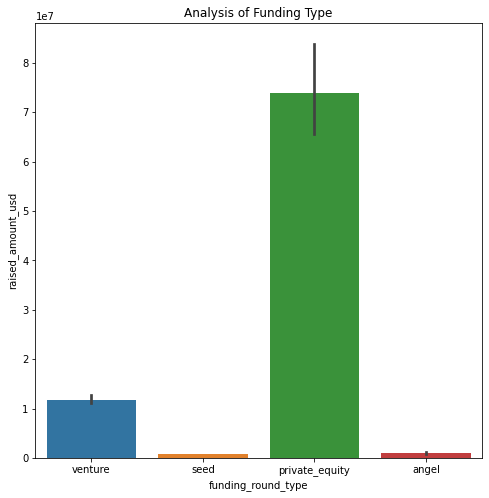

In [841]:
### # 1
plt.figure(figsize=(8,8))
sns.barplot(x = 'funding_round_type', y='raised_amount_usd', data=master_frame)
plt.xlabel='Funding Type'
plt.ylabel ='Amount Raised (USD in 10s of Millions)'
plt.title('Analysis of Funding Type')
plt.show()


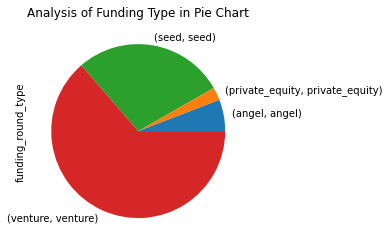

In [756]:
# plt.figure(figsize=(7,7))
master_frame_funding_type['funding_round_type'].value_counts().plot.pie()
plt.title('Analysis of Funding Type in Pie Chart')
plt.show()

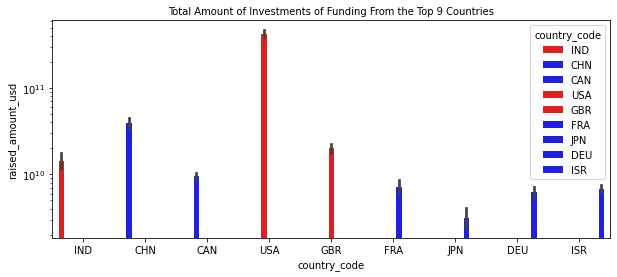

In [795]:
#### #2
colors = {'USA':'red','GBR':'red','IND':'red','CHN':'blue','CAN':"blue","FRA":"blue",'JPN':'blue','DEU':'blue','ISR':'blue'}
plt.figure(figsize=(10,4))
sns.barplot(data=top9, x='country_code', y='raised_amount_usd', estimator = np.sum,hue='country_code', palette=colors)
plt.xlabel = 'Funding Type'
plt.ylabel = 'Raised Amount in USD'
plt.yscale('log')
plt.title('Total Amount of Investments of Funding From the Top 9 Countries',fontsize =10)
plt.show()

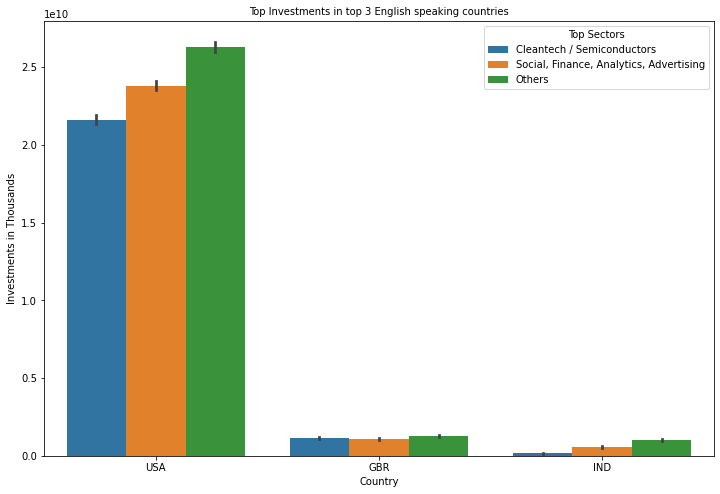

In [836]:
#### main sectors in top 3 english speaking countries 

tables = [D1, D2, D3]
result = pd.concat(tables)
result.rename(columns={'main_sector': 'Top Sectors'},inplace=True)
result = result[result['Top Sectors'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
plt.figure(figsize=(12, 8))
a = sns.barplot(x='country_code', y='raised_amount_usd', hue = result['Top Sectors'], data=result, estimator=np.sum)
a.set(xlabel='Country', ylabel='Investments in Thousands')
plt.title('Top Investments in top 3 English speaking countries', fontsize = 10)
plt.show()